<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***DBSCAN***

$ \ $

Density-Based Spatial Clustering of Applications with Noise ($DBSCAN$) is a base algorithm for density-based clustering.

$ \ $

----

## ***Use cases of DBSCAN***

$ \ $

The following things are the use cases of $DBSCAN$:



* $\color{lightblue}{\text{Recommender systems}}$ that make recommendations to users based on preferences (such as Netflix viewing patterns) of similar users (such as neighbors).


* $\color{lightblue}{\text{Anomaly detection}}$ that identifies rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.


* $\color{lightblue}{\text{Customer segmentation}}$ that aims at separating customers into multiple clusters, and devise targeted marketing strategy (diseñar una estrategia de marketing dirigida) based on each cluster's characteristics.

$ \ $

-----

## ***When is DBSCAN better than K-Means?***

$ \ $

You are a Data Scientist working for a retail company, and the marketing team wants you to use Data Science techniques to divide the company's customer base into groups of individuals that are similar in specific aspects such as:

* age 

* gender

* spending behavior

so that they could devise targeted marketing strategy for each group based on its average spending on various product categories. In this case, since you don't know what would be the optimal number of groups/clusters to look for in the customer base, you can't use $K$-Means as it requires you to specify the number of clusters. Besides, since the marketing team wants to understand the average spendings of each group in order to devise its corresponding promotion, we should use an algorithm that's more robust to outliers.



<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/images/marketing.jpg" style="width: 70%">

In this notebook, we will look at a clustering technique using ***DBSCAN***, which help us overcome the two aforementioned shortcomings (deficiencias antes mencionadas) of the $K$ - Means clustering. Also, we will be able to look at the handwriting example to prove whether someones handwriting is bad, using ***DBSCAN***.


$ \ $

----

## ***Objectives***

After completing this lab you will be able to:

* Explain what ***DBSCAN*** does and how it works.


* Understand the strengths, weaknesses, and use cases of ***DBSCAN***.




$ \ $

----

## ***Setup***


For this lab, we will be using the following libraries:


* [pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for managing the data.


* [numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for mathematical operations.


* [matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for visualizing the data.


* [scipy](https://docs.scipy.org/doc/scipy/reference/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for complex numerical operations.


* [sklearn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) for machine learning and machine-learning-pipeline related functions.


$ \ $

-----

## ***Importing Required Libraries***

$ \ $

The following required modules are pre-installed in the Skills Network Labs environment.


In [1]:
import string
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_context('notebook')
sns.set_style('white')

In [3]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

----

## ***Background***

$ \ $

$\color{lightblue}{\text{DBSCAN}}$ is a clustering algorithm that stands as $\color{lightblue}{\text{Density-Based Spatial Clustering of Applications with Noise}}$, where:

* Density-Based  will group points that are densely-packed together.

* Spacial-Clustering is for numerical points $P= (x_{1},\dots,x_{n}) \in \mathbb{R}^n$.

* Applications with Noise is great for applications that have noise.

This is because $DBSCAN$ also finds outliers/noise in data.



$ \ $

----

## ***How does DBSCAN work?***

$ \ $

$\color{lightblue}{\text{DBSCAN}}$ uses two parameters:

* `eps` (epsilon - $\epsilon$) - the max distance between two points for them to be considered "in the same neighborhood".

* `min_samples` (minimum number of samples) - the minimum number of neighbors a point needs to be considered a core point.

If a point is a neighbor of a core point, then it's in the same cluster as that point. Otherwise, it's considered to be noise.

$ \ $

-----

## ***Additional Resources***

$ \ $

You're encouraged to take a look at:

* [Pseudocode for DBSCAN](https://www.researchgate.net/figure/Pseudocode-of-the-DBSCAN-algorithm_fig2_325059373?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01), if a more in-depth understanding is desired.

* [The original DBSCAN paper ](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) hosted by [aaai.org](https://www.aaai.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01).

$ \ $

-----

## ***Visual Example***

$ \ $

$(1)$ We begin with a visual example that demonstrates how $DBSCAN$ works. Let's load the dataset `grid.csv` into a DataFrame.

In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/example1.csv')
df.head()

,0,1
0,-3,0
1,0,-3
2,0,0
3,0,3
4,3,0


$ \ $

$(2)$ We can see the dataset is a small handful of points $3$ units apart.

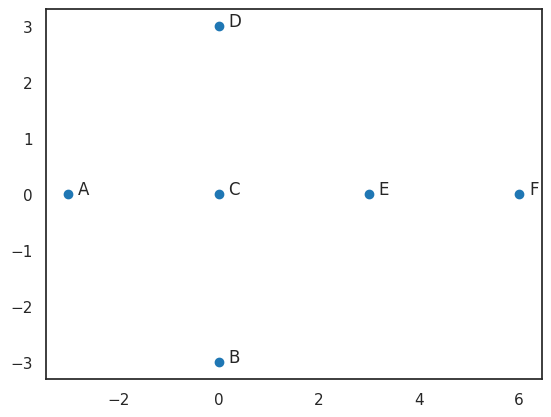

In [5]:
# la funcion plt.rcParams define una configuración de tiempo de ejecución (rc) que contiene los estilos predeterminados para cada elemento de trazado creados.
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

# realizamos un scatterplot (x,y)
x = df['0']
y = df['1']
plt.scatter(x, y)

# esta iteracion se hace para describir las letras en los puntos dados
for letra, punto in zip(string.ascii_uppercase, df.iterrows()):

    # describimos la posicion donde describiremos la letra que describira el punto
    x = punto[1][0] + 0.2
    y = punto[1][1]
    plt.annotate(letra, (x,y))

# mostramos la imagen en pantalla
plt.show()

$ \ $

$(3)$ We apply the $DBSCAN$ algorithm with:

* `eps = 3`.

* `min_samples = 4`

In [6]:
# creamos un modelo DBSCAN con los parametros dichos anteriormente
cluster = DBSCAN(eps = 3, min_samples = 4)

# entrenamos nuestro modelo con el dataframe df
cluster.fit(df)

# describimos el numero de etiquetas de los grupos que no tienen ruido
longitud = len(set(cluster.labels_) - set([-1]))

# describimos el numero de clusters con ruido
ruido = (cluster.labels_ == -1).sum()

# mostramos en pantalla
print(f'DBSCAN found {longitud} clusters and {ruido} points of noise.')

DBSCAN found 1 clusters and 1 points of noise.



Let's think about what should happen:

* The point $C$ is the only point that has `min_samples = 4` or more points within a distance of `eps = 3`.

* This makes $C$ the only core point in the dataset.

* Points $A$, $B$, $D$, and $E$ are within `eps = 3` units from $C$.

* This means $A$, $B$, $D$, and $E$ will be in the same cluster as $C$.

* Finally, point $F$ is not within `eps = 3` units of a core point

* $F$ will be labeled as noise.

$ \ $

$(4)$ Let's visualize how $DBSCAN$ clustered our dataset.


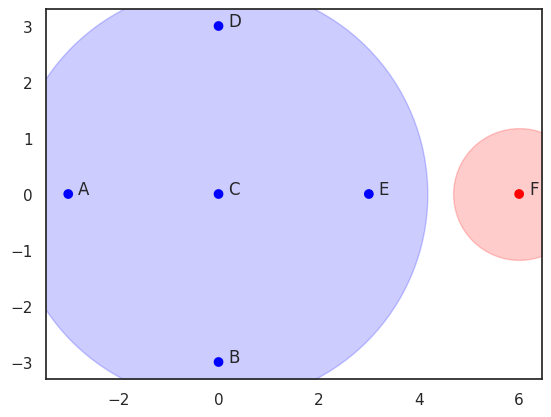

In [7]:
# la funcion plt.rcParams define una configuración de tiempo de ejecución (rc) que contiene los estilos predeterminados para cada elemento de trazado creados.
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

# realizamos un scatterplot (x,y), pintando con 
x = df['0']
y = df['1']
# cluster = DBSCAN(eps = 3, min_samples = 4)
# cluster.fit(df)
colores_clusters = [['blue', 'red'][t] for t in cluster.labels_]
plt.scatter(x, y, c = colores_clusters)

# creamos alrededor del punto C = (0,0) un circulo
plt.scatter(0, 0, c = 'blue', alpha = 0.2, s = 90000)

# creamos alrededor del punto F = (6,0) un circulo
plt.scatter(6, 0, c = 'red', alpha = 0.2, s = 9000)

# esta iteracion se hace para describir las letras en los puntos dados
for letra, punto in zip(string.ascii_uppercase, df.iterrows()):

    # describimos la posicion donde describiremos la letra que describira el punto
    x = punto[1][0] + 0.2
    y = punto[1][1]
    plt.annotate(letra, (x,y))

# mostramos la imagen en pantalla
plt.show()

As expected, $DBSCAN$ found one cluster (blue) and one point of noise (red).

$ \ $

---

## ***Proving Someone Has Bad Handwriting***

$ \ $

Let's say your friend has aweful handwriting (letra horrible). You (as a good friend) want to help out, but:

$ \ $

$$\color{lightblue}{\text{They will only work on their handwriting if you can prove their handwriting is bad.}}$$

$ \ $

One way to do this is to cluster readable handwriting from other people using $\color{aquamarine}{DBSCAN}$. The idea is, if your friend struggles (lucha) to properly write a specific character, it will either:

* Be marked as noise by `DBSCAN`.

* Be grouped with a different kind of character.

Our pipeline will be as follows

* Load and Scale the data.

* Apply `TSNE` algorithm (`TSNE` reduces the dimension of data such that similar data is closer together).

* Apply `DBSCAN` algorithm.

* Visualize our categorized data and show how dissimilar our friend's handwriting is.

$ \ $

$(1)$ First, we handwritten data we gathered from our friend's math assignment.


In [8]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/012.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0,0,0,0,16,13,14,14,0,0,...,0,0,0,11,15,14,14,0,0,0
1,0,16,10,0,0,0,0,0,0,0,...,14,0,0,0,0,-1,2,13,7,1
2,0,12,14,6,5,3,0,0,0,16,...,0,0,10,11,0,0,2,14,8,2


$ \ $

$(2)$ Let's visualize our data using `matplotlib`. We will need to reshape the data into $8 \times 8$ images, so matplotlib can properly display it.


In [9]:
# describimos todos los nombres de las columnas del dataframe df excepto la ultima columna 'y'
columnas = (df.columns != 'y')

# tomamos el datframe sin la ultima columna y 
df.iloc[:, columnas]

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,16,13,14,14,0,0,...,0,0,0,0,11,15,14,14,0,0
1,0,16,10,0,0,0,0,0,0,0,...,16,14,0,0,0,0,-1,2,13,7
2,0,12,14,6,5,3,0,0,0,16,...,16,0,0,10,11,0,0,2,14,8


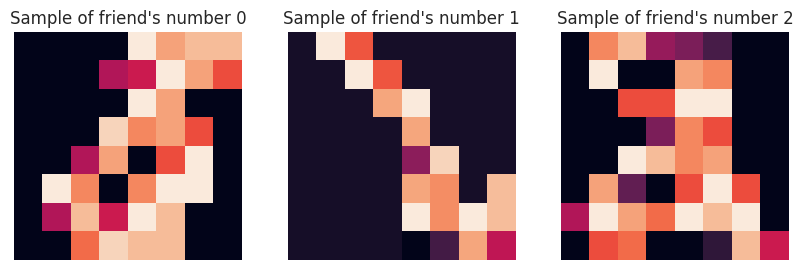

In [10]:
# tomamos el datframe sin la ultima columna y transformamos esta data en un array (matriz)
friend_digits = df.iloc[:, columnas].to_numpy()

# define una configuración de tiempo de ejecución (rc) que contiene los estilos predeterminados para cada elemento de trazado que cree
# describimos el tamaño de la imagen 
plt.rcParams['figure.figsize'] = (10, 10)

# tomamos los renglones que estan en R^64 y los escribimos con tamaño 8x8, luego estos datos se describen como los elementos del conjunto it
it = (x.reshape(8, 8) for x in friend_digits)

# creamos una imagen para describir 3 plots en forma de renglon [A|B|C]
fig, ax = plt.subplots(1, 3, sharex = 'col', sharey = 'row')

# realizamos una iteracion sobre la lista [0, 1, 2]
for i in [0, 1, 2]:

    # quitamos los ejes del i-esimo plot
    ax[i].axis('off')

    # establecemos el titulo del i-esimo plot
    ax[i].set_title(f"Sample of friend's number {i}")

    # describimos la imagen del i-esimo renglon
    ax[i].imshow(next(it))

# mostramos en pantalla el resultado
plt.show()

$ \ $

$(3)$ Next, we import a dataset of digits from sklearn based on the $MNIST$ dataset. This data contains handwritten numbers from hundreds individuals across the United States.

In [11]:
# cargamos la base de datos
digits, y = load_digits(return_X_y = True)

# mostramos como se ven los datos en un dataframe
pd.DataFrame(digits).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


$ \ $

$(4)$ Let's visualize our data using matplotlib.

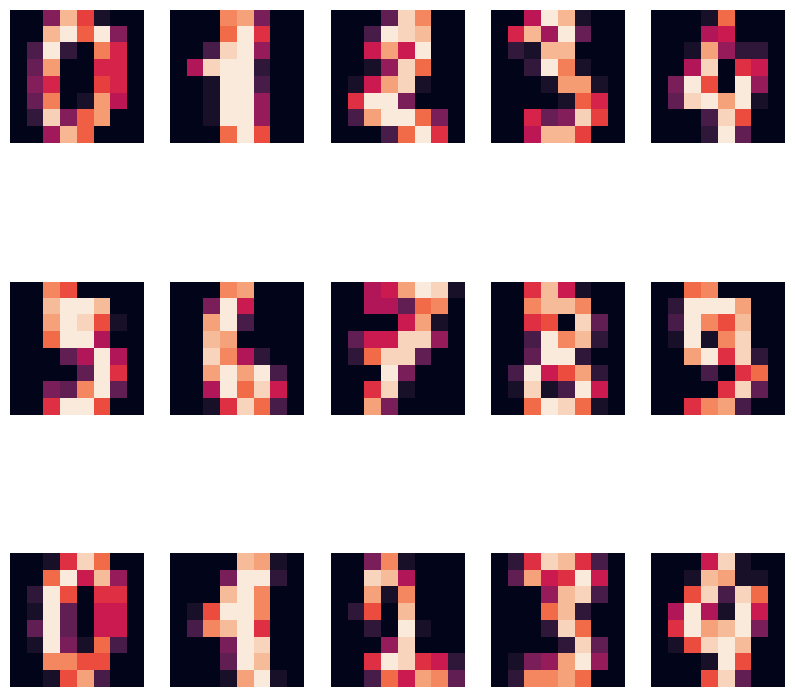

In [12]:
# describimos el tamaño del plot
plt.rcParams['figure.figsize'] = (10,10)

# debido a tenemos 64 columnas, entonces describimos los renglones en R^64 como arrays (matrices) de tamaño 8x8
it = (x.reshape(8, 8) for x in digits)

# creamos la subdivision de los subplots -----> vamos a tener una matrices de subplots de tamaño 3x5
fig, ax = plt.subplots(3, 5, sharex = 'col', sharey = 'row')

# realizamos una iteracion sobre la lista [0, 1, 2] de 3 elementos
for i in [0, 1, 2]:

    # realizamos una iteracion sobre la lista [0, 1, 2] de 5 elementos
    for j in [0, 1, 2, 3, 4]:

        # vamos a el plot (i,j) y quitamos los ejes
        ax[i, j].axis('off')

        # mostramos la imagen siguiente del conjunto it
        ax[i, j].imshow(next(it))

# mostramos la imagen creada en pantalla
plt.show()

$ \ $

$(5)$ Now we create the dataset for our pipeline, containing both $MNIST$ and our friend's digits.

In [13]:
# la funcion np.r_ concatena dos filas

# concatenamos digits y friend_digits
# friend_digits = df.iloc[:, columnas].to_numpy()
# digits, y = load_digits(return_X_y = True)
data = np.r_[digits, friend_digits]

# concatenamos y, df['y']
y = np.r_[y, df['y']]

$ \ $

$(6)$ Next, we initialize the objects for our pipeline, with our chosen hyperparameters.

In [14]:
# TSNE es una herramienta para visualizar datos de alta dimensión
# creamos un modelo TSNE con los siguientes parametros
# pca = principal component analysis
embedding = TSNE(n_components = 2,
                 init = "pca",
                 n_iter = 500,
                 n_iter_without_progress = 150,
                 perplexity = 10,
                 random_state = 0)

In [15]:
# entrenamos nuestro modelo y obtenemos un conjunto de datos mediante una transformacion
# A -----> T(A)
e_data = embedding.fit_transform(data)

In [16]:
e_data

array([[ -2.0427132,  41.238743 ],
       [ 18.974203 , -12.82007  ],
       [ -7.73095  , -23.1162   ],
       ...,
       [-34.324375 ,   9.313557 ],
       [-30.215403 , -20.896317 ],
       [-26.785982 , -12.059653 ]], dtype=float32)

$ \ $

$(7)$ We get our data after applying `TSNE` algorithm.


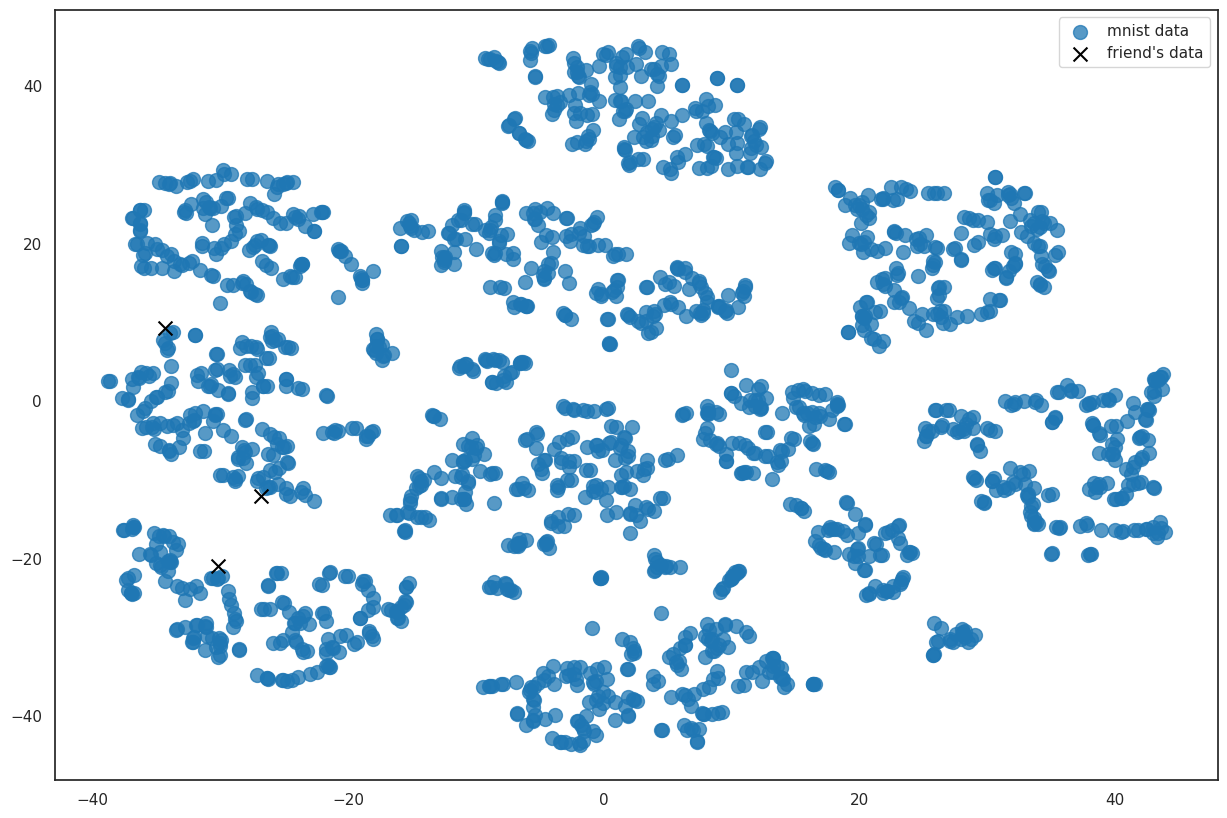

In [17]:
# establecemos el tamaño de la imagen
plt.rcParams['figure.figsize'] = (15, 10)

# describimos el numero de renglones del array (matriz) friend_digits
# friend_digits = df.iloc[:, columnas].to_numpy()
n = friend_digits.shape[0]

# e_data = embedding.fit_transform(data)
# describimos la columna 0 del array e_data <-------- sin tomar los ultimos n renglones
x = e_data[:-n, 0]

# e_data = embedding.fit_transform(data)
# describimos la columna 1 del array e_data <-------- sin tomar los ultimos n renglones
y = e_data[:-n, 1]

# creamos un escatterplot (x,y)
plt.scatter(x, y, marker = 'o', alpha = 0.75, label = 'mnist data', s = 100)

# e_data = embedding.fit_transform(data)
# describimos la columna 0 del array e_data <-------- tomando solamente los ultimos n renglones
X = e_data[-n:, 0]

# e_data = embedding.fit_transform(data)
# describimos la columna 1 del array e_data <-------- tomando solamente los ultimos n renglones
Y = e_data[-n:, 1]

# creamos un escatterplot (X, Y)
plt.scatter(X, Y, marker = 'x', color = 'black', label = "friend\'s data", alpha = 1, s = 100)

# describimos la leyenda de la imagen 
plt.legend(bbox_to_anchor = [1, 1])

# mostramos la imagen en pantalla
plt.show()

$ \ $

$(8)$ Next, we apply $DBSCAN$, using our chosen hyperparameters.

In [18]:
# creamos un modelo DBSCAN con los parametros establecidos
cluster = DBSCAN(eps = 5, min_samples = 20)

# entrenamos nuestro modelo con la data e_data
# e_data = embedding.fit_transform(data)
cluster.fit(e_data)

# describimos el numero de etiquetas de los grupos que no tienen ruido
longitud = len(set(cluster.labels_) - set([-1]))

# describimos el numero de los grupos con ruido
ruido = (cluster.labels_ == -1).sum()

# mostramos en pantalla
print(f'DBSCAN found {longitud} clusters and {ruido} points of noise.')

DBSCAN found 10 clusters and 24 points of noise.


$ \ $

$(9)$ Let's visualize our data again, categorized by $DBSCAN$.

In [21]:
# describimos el tamaño de la imagen
plt.rcParams['figure.figsize'] = (20,15)

# tomamos las etiquetas de cluster
# cluster = DBSCAN(eps = 5, min_samples = 20)
unique_labels = set(cluster.labels_)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

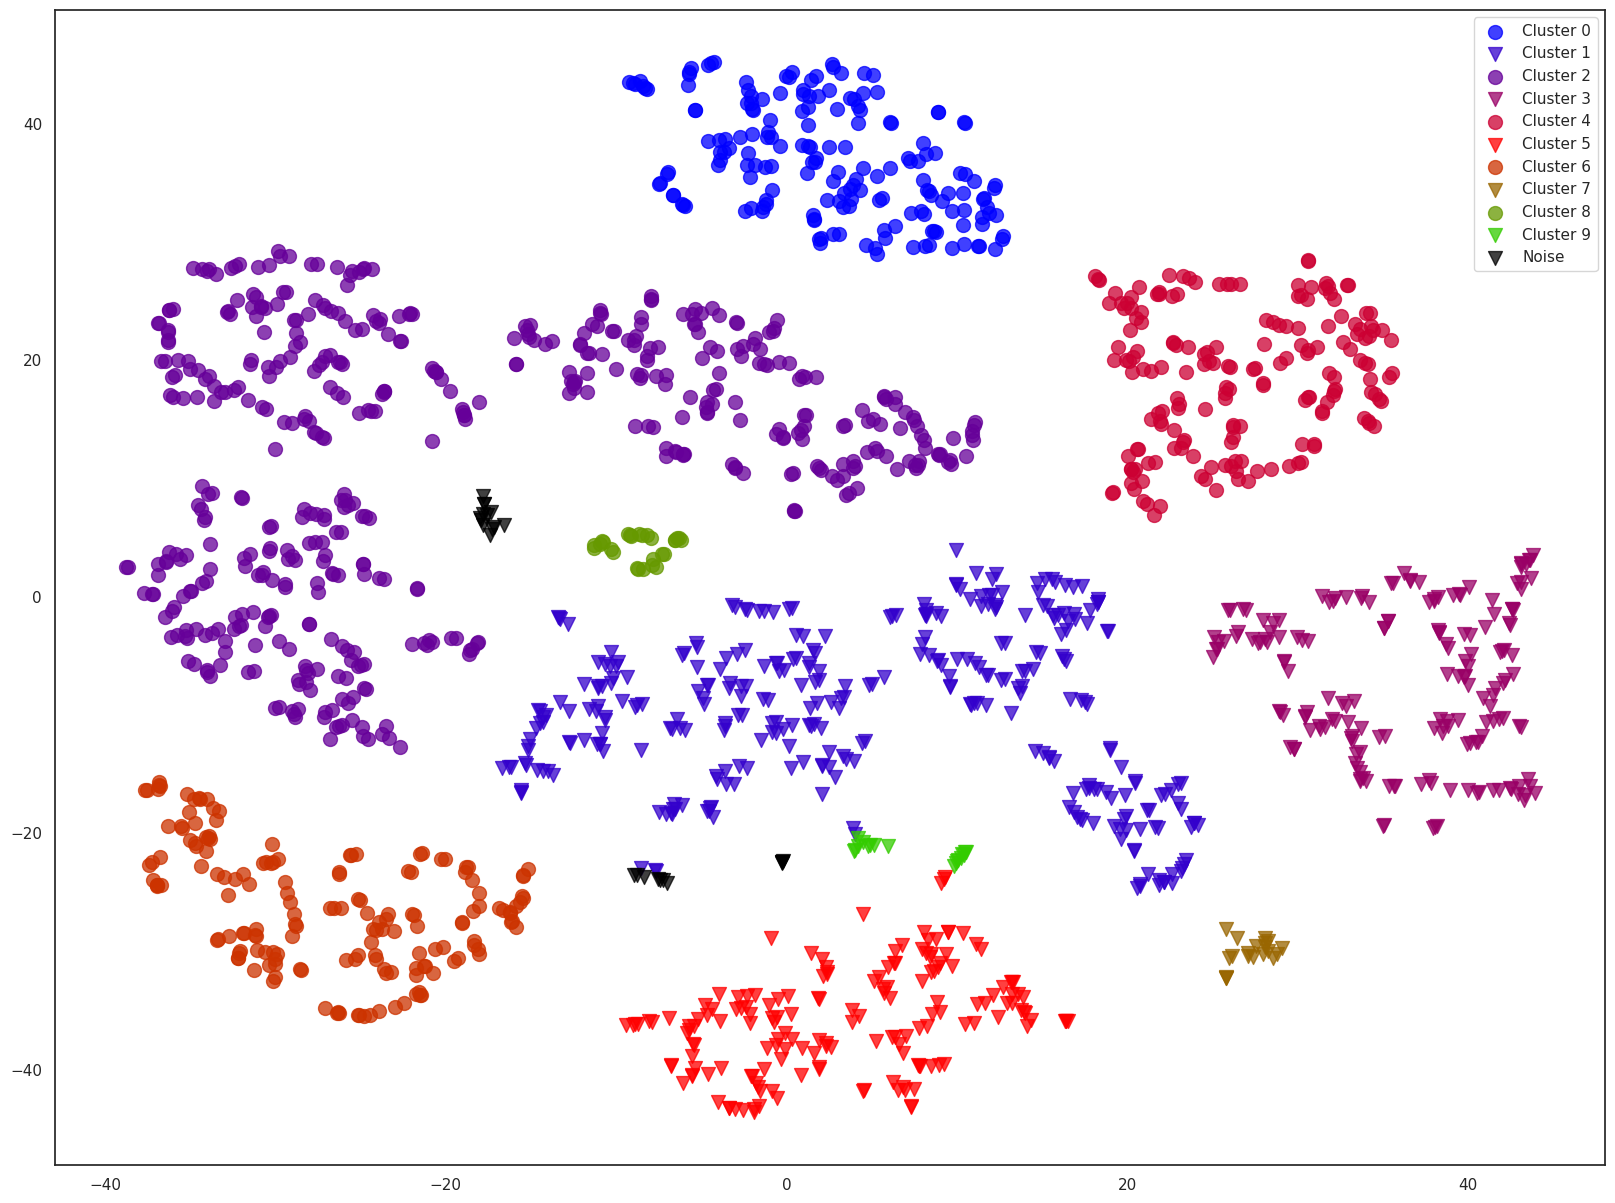

In [22]:
# describimos la cantidad de elementos en unique_labels
n_labels = len(unique_labels)

# la funcion plt.cm.get_cma describe una funcion llamada mapa de colores  
cmap = plt.cm.get_cmap('brg', n_labels)

# realizamos una iteracion sobre unique_labels = set(cluster.labels_)
for t in unique_labels:

    # tomamos las etiquetas de cluster que toman el valor de t
    mask = (cluster.labels_ == t)

    # tomamos la 0-columna e_data y los renglones con etiqueta igual a t
    # e_data = embedding.fit_transform(data)
    x = e_data[mask, 0]

    # tomamos la 1-columna e_data y los renglones con etiqueta igual a t
    # e_data = embedding.fit_transform(data)
    y = e_data[mask, 1]

    # tomamos el mapa de colores y con esta funcion establecemos un numero de colores igual al numero de elementos en unique_labels
    colores = [cmap(t) if t >= 0 else 'Black']

    # establecemos la etiqueta correspondiente al iterando t
    if t >= 0:
      label = f"Cluster {t}"
    else:
      label = "Noise"

    # realizamos un plot (x,y)
    plt.scatter(x, y, c = colores, marker = 'ov'[t%2], alpha = 0.75, s = 100, label = label)

# mostramos la leyenda de la imagen
plt.legend(bbox_to_anchor = [1, 1])

# mostramos la imagen construida en pantalla
plt.show()

$ \ $

$(10)$ Let's see how our pipeline categorized some of the data in its original, handwritten form.

In [23]:
np.random.choice(7, 5, replace = False)

array([5, 3, 2, 1, 6])

In [24]:
data.shape

(1800, 64)

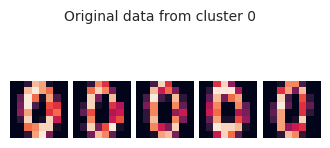

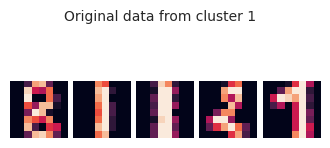

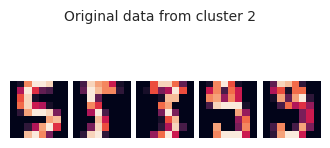

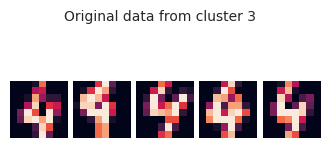

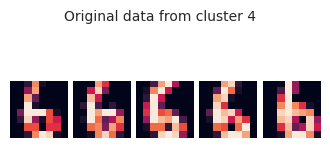

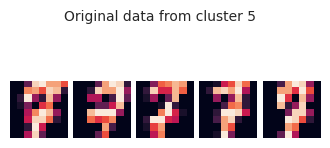

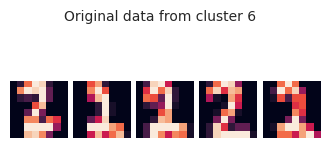

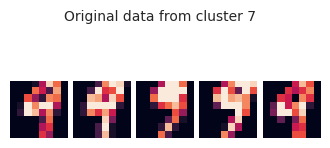

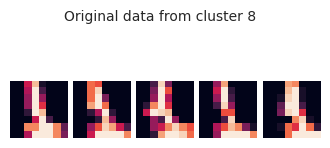

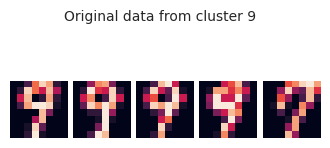

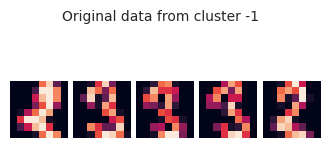

In [25]:
# describimos el tamaño de la imagen
plt.rcParams['figure.figsize'] = (4, 20)

# realizamos una iteracion sobre unique_labels = set(cluster.labels_)
for label in unique_labels:

    # describimos esta mascara, la cual nos dice cuando una etiqueta de cluster es igual a label
    mask = cluster.labels_ == label

    # tomamos la mascara anterior sobre el array data
    cluster_data = data[mask]

    # describimos el numero de elementos de cluster_data
    m = len(cluster_data)

    # si m >= 5, entonces tomamos 5 numeros de la lista [0,1,...,m-1]
    escogencia = np.random.choice(m, 5, replace = False)

    # tomamos un subconjunto de datos de cluster_data, los cuales se encuentran en las posiciones obtenidas en el array escogencia 
    nums = cluster_data[escogencia]

    # remodelamos el tamaño de los elementos en nums, para que tengan tamaño 8x8
    it = (x.reshape(8, 8) for x in nums)

    # creamos una imagen para describir varios subplots de la forma [A_1|..|A_5]
    fig, ax = plt.subplots(1, 5)

    # ajustamos el tamaño  de la imagen para realizar los subplots
    ax = ax.reshape(1, 5)

    # ajustamos los subplots con esta funcion
    plt.subplots_adjust(wspace = 0.1, hspace = -0.69)

    # describimos un titulo en el subplot 
    fig.suptitle(f"Original data from cluster {label}", fontsize = 10, y = 0.545)

    # realizamos una iteracion sobre la lista [0, 1, 2, 3, 4]
    for j in [0, 1, 2, 3, 4]:

        # quitamos los ejes les subplot j
        ax[0, j].axis('off')

        # mostramos la j-esima imagen de it
        ax[0, j].imshow(next(it))

# mostramos la imagen completa en pantalla
plt.show()

$ \ $

$(11)$ Let's compare `DBSCAN`'s clusters to the actual labels.

In [26]:
# la funcion np.r_ concatena dos filas

# cargamos la base de datos
digits, y = load_digits(return_X_y = True)

# concatenamos y, df['y']
Y = np.r_[y, df['y']]

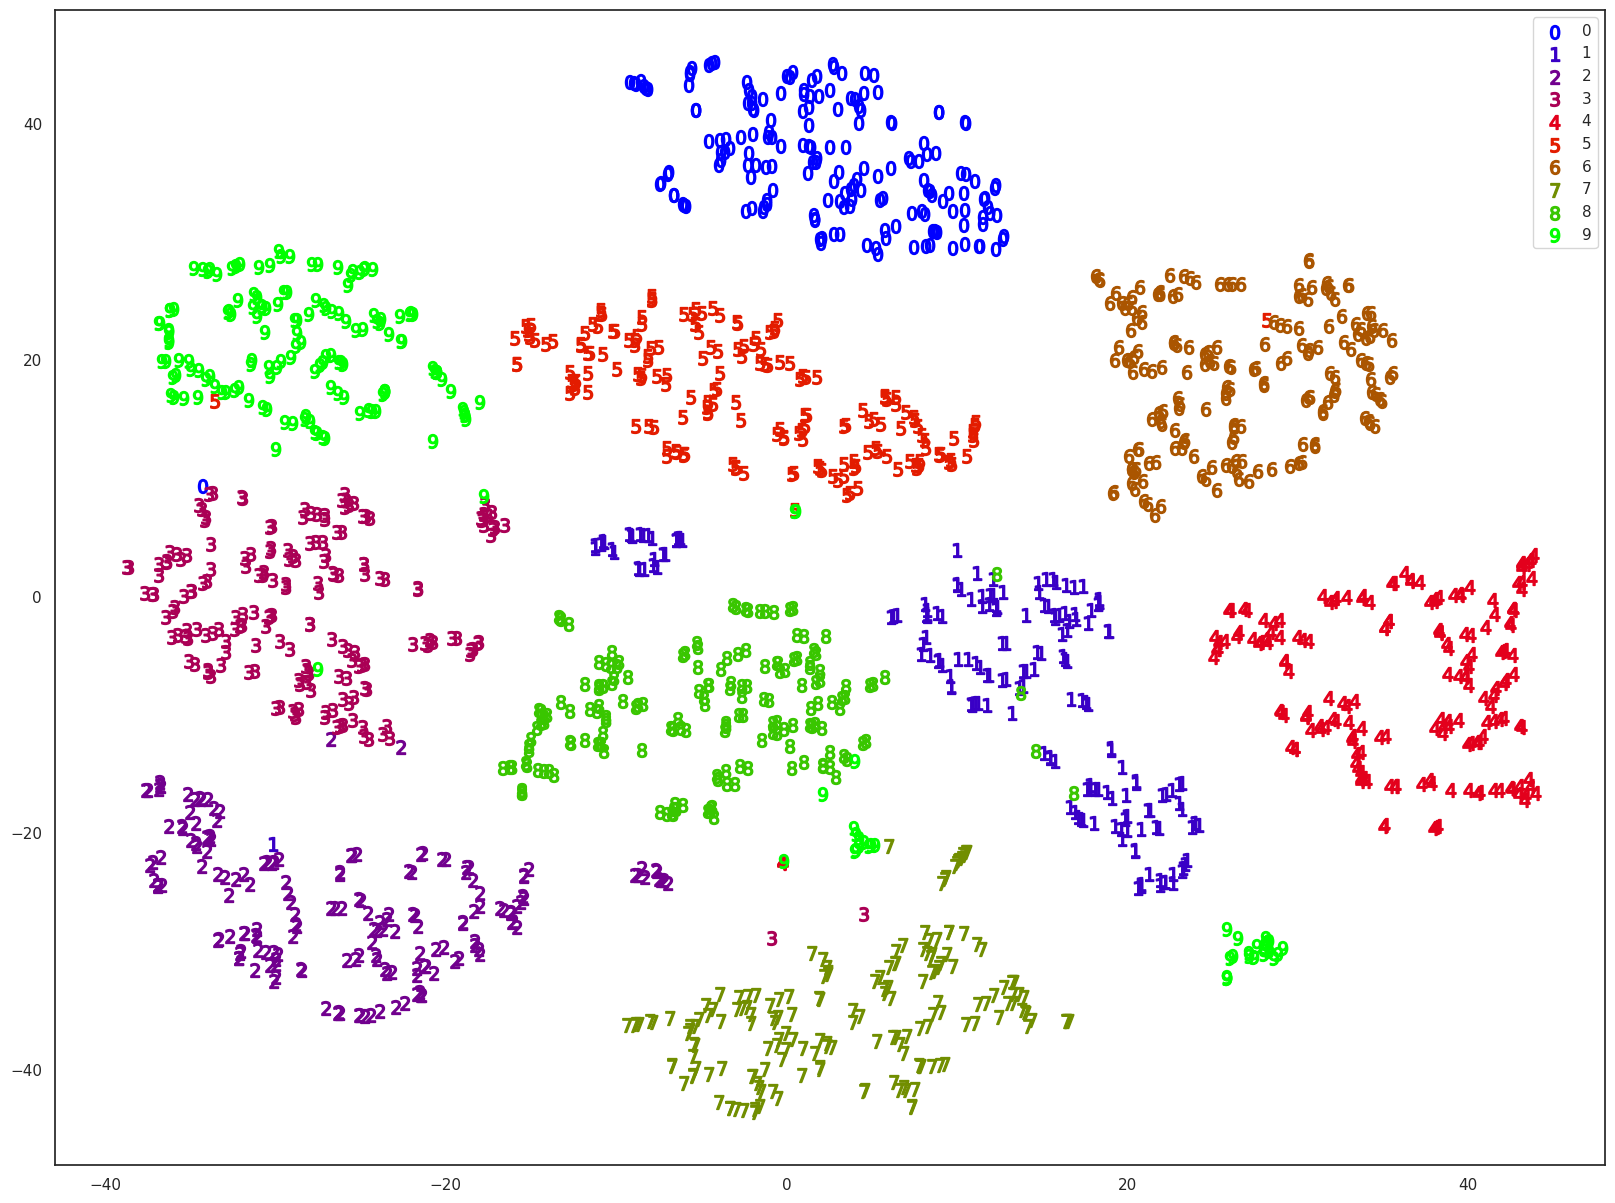

In [27]:
# describimos el 
plt.rcParams['figure.figsize'] = (20,15)

# establecemos el conjunto de datos -----> basicamente eliminamos los valores repetidos de y
unique_labels = set(y)

# describimos el numero de elementos en  
n_labels = len(unique_labels)

# la funcion plt.cm.get_cma describe una funcion llamada mapa de colores
cmap = plt.cm.get_cmap('brg', n_labels)

# creamos una iteracion sobre set(y)
for t in unique_labels:

    # describimos la mascara que describe que valores de y son iguales a t
    mask = (Y == t)

    # tomamos la 0-columna de e_data con los renglones descritos en la mascara
    x = e_data[mask, 0]

    # tomamos la 1-columna de e_data con los renglones descritos en la mascara
    y = e_data[mask, 1]

    # creamos un scatterplot (x,y)
    plt.scatter(x, y, c = [cmap(t)], marker = f'${t}$', alpha = 1, label = f'{t}', s = 100)

# describimos la leyenda de la imagen
plt.legend(bbox_to_anchor = [1, 1])

# mostramos la imagen en pantalla
plt.show()

$ \ $

$(12)$ Finally, we can prove our friend's handwriting is unreadable (even for state-of-the-art unsupervised algorithms).

In [28]:
# tomamos las 3 ultimas columnas de cluster.labels_
A = cluster.labels_[-3:]

# tomamos las ultimas 3 columnas de Y
B = Y[-3:]

# realizamos una iteracion sobre zip(A, B)
for indice, (l, t) in enumerate(zip(A, B)):

    # dejamos espacio
    print('\n')

    # describimos la asociacion de los indices con los clusters
    print(f"Your friend\'s {indice}-th sample was categorized as being in cluster #{l}")

    # si el cluster del correspondiente iterador toma el valor de -1, entonces aplicamos este condicional
    if l == -1:

        # dejamos espacio
        print('\n')

    # en caso contrario del condicional anterior aplicamos esta parte
    else:

        # esta mascara nos dice que etiquetas del cluster tienen valor l
        mask = (cluster.labels_ == l)

        # la funcion np.unique devuelve los elementos únicos ordenados en un array 
        v, c = np.unique(Y[mask], return_counts = True)

        # M = indice donde c alcanza su valor maximo
        M = np.argmax(c)

        # describimos el ultimo elemento de la lista v
        # v[M] = v[-1]
        mfreq = v[M]

        # obtenemos el valor maximo de c y lo dividimos por la sumatoria de los datos de c
        # esto es una razon rara dado que su interpretacionno es natural, pero sigue siendo un numero entre 0 y 1
        ratio = c.max() / c.sum()

        # mostramos en pantallacual es el numero del l-esimo cluster
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}')
        
    # mostramos la relacion entre el i-esimo indice y el valor t ------> (i,t)
    print(f"Your friend\'s {indice} - th sample is supposed to be the number {t}")



Your friend's 0-th sample was categorized as being in cluster #2
Cluster 2 is 36.27% the number 5
Your friend's 0 - th sample is supposed to be the number 0


Your friend's 1-th sample was categorized as being in cluster #6
Cluster 6 is 99.40% the number 2
Your friend's 1 - th sample is supposed to be the number 1


Your friend's 2-th sample was categorized as being in cluster #2
Cluster 2 is 36.27% the number 5
Your friend's 2 - th sample is supposed to be the number 2


As you can see, all our friend's data was either categorized as noise, or put in a category where the vast majority is a different number.

$ \ $

-----

## ***Exercises***

$ \ $

$(1)$ In this section, you can practice using `DBSCAN` by applying the algorithm on different datasets. Please run the following code to acquire the dataset for the exercises.

In [29]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/DBSCAN_exercises.csv')
df.head()

,x,y
0,-4.792194,-9.720065
1,-0.102493,20.667312
2,-2.998773,7.034104
3,13.348503,-16.374098
4,6.827445,10.782092


$ \ $

$(2)$ Here is what the data looks like.

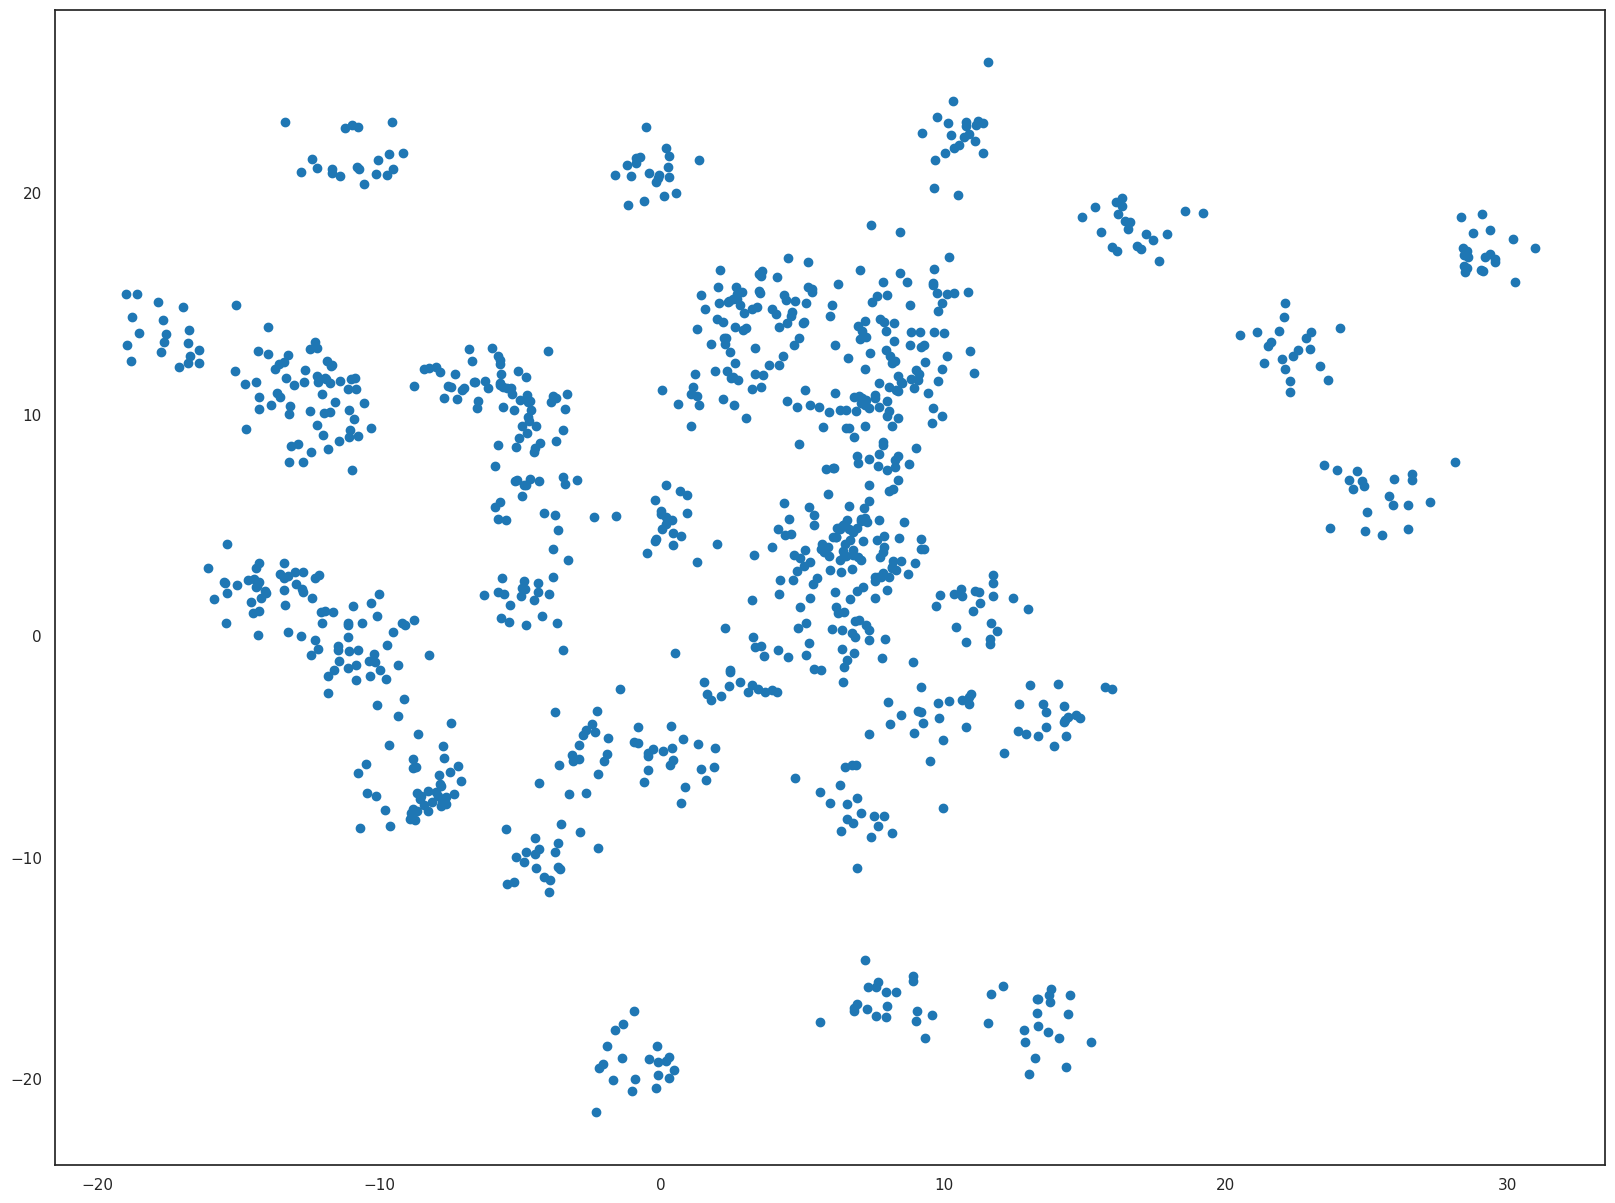

In [30]:
# tomamos la 0-columna del dataframe
x = df['x']

# tomamos la 1-columna del dataframe
y = df['y']

# realizamos un scatterplot (x,y)
plt.scatter(x, y)

# mostramos la imagen en pantalla
plt.show()

$ \ $

$(3)$ Find the number of clusters with:

* `eps = 2`.

* `min_samples = 10`.

* Not including noise.

In [31]:
# creamos un modelo DBSCAN con los parametros establecidos
cluster = DBSCAN(eps = 2, min_samples = 10)

# entrenamos nuestro modelo con el dataframe df
cluster.fit(df)

# describimos el conjunto de elementos de cluster.labels_ (sin repeticion) sin el elemento -1
conjunto = set(cluster.labels_) - {-1}

# describimos la cantidad de elementos en el conjunto anterior
longitud = len(conjunto)

# mostramos en pantalla la cantidad de elementos
print(longitud)

15


$ \ $

$(4)$ Using the fitted `DBSCAN` object from the previous exercise, find $\%$ of the data that was marked as noise.

In [32]:
# describimos las etiquetas de los clusters dispersas y luego contamos la cantidad de clusters que tienen ruido
numerador = (cluster.labels_ == -1).sum()

# describimos todas las etiquetas de los clusters
denominador = len(cluster.labels_)

# describimos el porcentage de los clusters que tienen ruido
porcentaje = 100*(numerador/denominador)

# mostramos el porcentage en pantalla
print(f"{porcentaje}%")

0.3%


$ \ $

$(5)$ It's very useful to visualize your clustered data when possible (i.e., when dimension is low enough). Using `matplotlib.pyplot`, we visualize the clustered data.

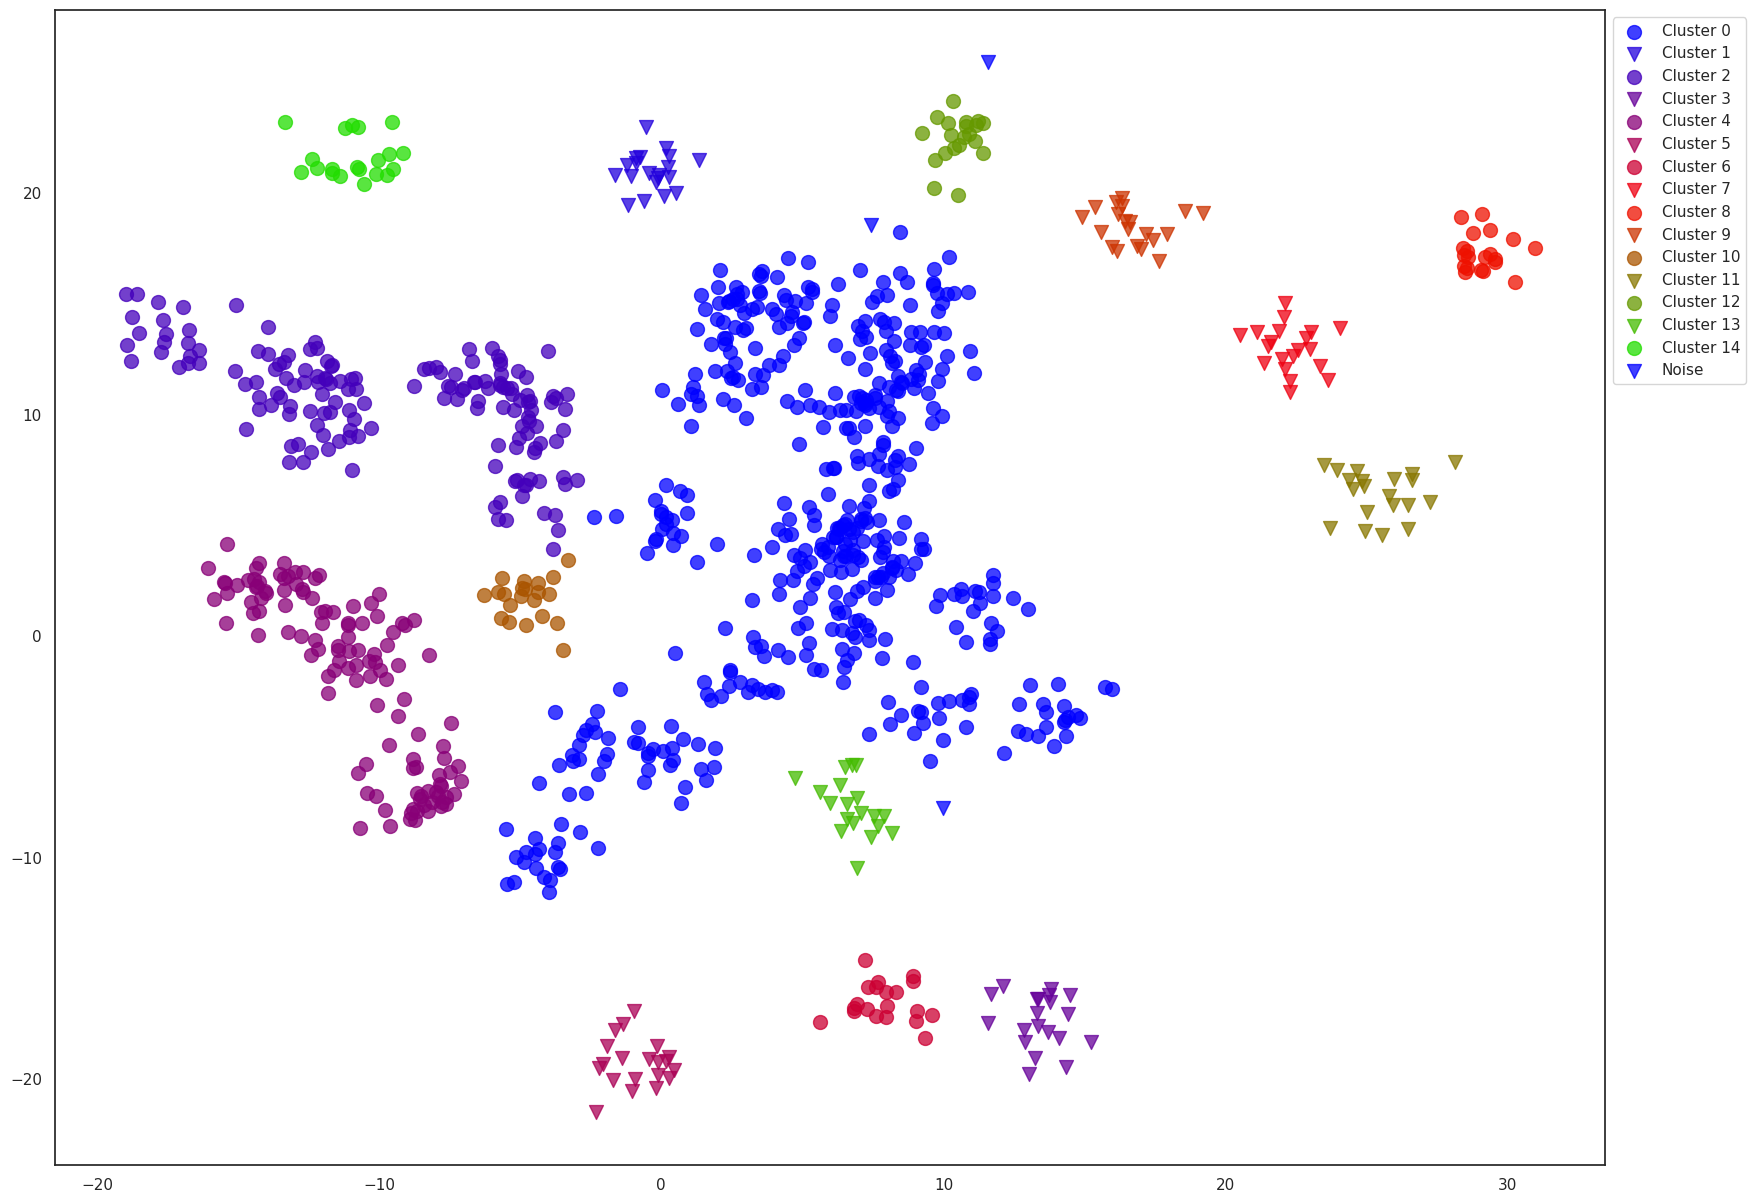

In [33]:
# describimos el tamaño de la imagen
plt.rcParams['figure.figsize'] = (20,15)

# formamos el conjunto de las etiquetas de los clusters (sin repeticiones)
unique_labels = set(cluster.labels_)

# describimos la cantidad de elementos en el conjunto unique_labels
n_labels = len(unique_labels)

# la funcion plt.cm.get_cma describe una funcion llamada mapa de colores
cmap = plt.cm.get_cmap('brg', n_labels)

# realizamos una iteracion sobre el conjunto unique_labels
for t in unique_labels:

    # describimos las etiquetas del cluster que son iguales a t
    mask = (cluster.labels_ == t)

    # describimos los renglones de la columna "x" del dataframe df que satisfacen la condicion de la mascara
    x = df['x'][mask]

    # describimos los renglones de la columna "y" del dataframe df que satisfacen la condicion de la mascara
    y = df['y'][mask]

    # si t es no negativo, entonces la etiqueta sera "Cluster {t}". En caso contrario es "Noise"
    if t >= 0:
      label = f"Cluster {t}"     
    else:
      label = 'Noise'

    # describimos un scatterplot (x,y) con los parametros adicionales para describir los colores y las formas
    plt.scatter(x, y, c = [cmap(t)], marker = 'ov'[t%2], alpha = 0.75, s = 100, label = label)

# describimos la leyenda de la imagen 
plt.legend(bbox_to_anchor = [1, 1])

# mostramos la imagen en pantalla
plt.show()